# Machine Learning Model to Predict Culture Positivity in Suspect Septic Arthritis




---



---



 Readme:
 **Training data was processed as follows:**
- Categorical data was converted to numerical data (Gender F/M converted to 0/1, Negative/Positive results converted to 0/1 etc).
- Columns with insufficient data were removed
- See clean CSV for reference
- Perhaps implement data validation on spreadsheet for future data captured

**Dataset Referenced** :
myInputCSVdataCentral1.csv


* NAME OF COLUMN WITH PREDICTION TARGET : POSITIVE SF CX




In [ ]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
data = pd.read_csv(io.BytesIO(uploaded['myInputCSVdataCentral1.csv']))


Saving myInputCSVdataCentral1.csv to myInputCSVdataCentral1.csv


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


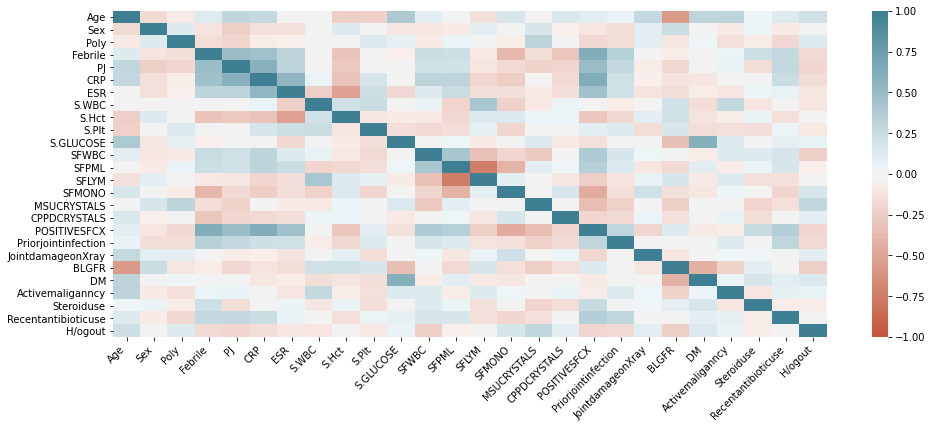

In [ ]:
corr = data.corr()
plt.figure(figsize=(16, 6))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

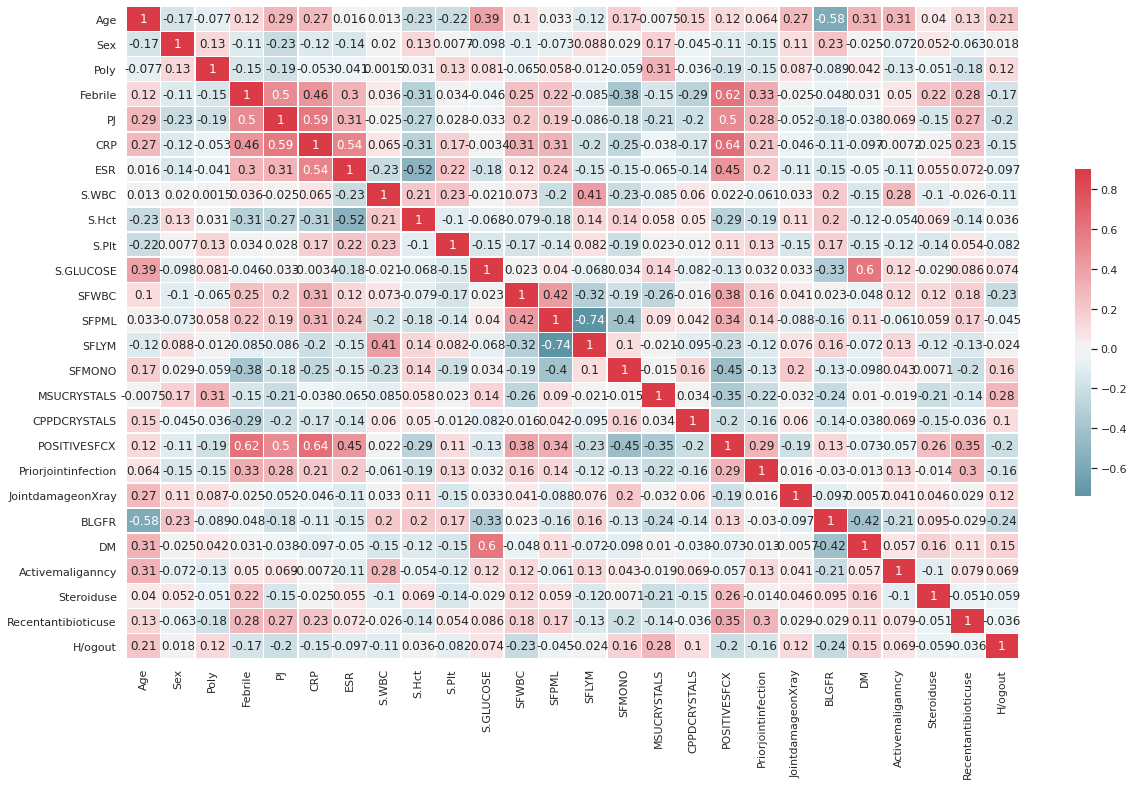

In [ ]:
#Add Coefficients to visualization
# Here is a visualization of relationships with coefficients displayed
sns.set(style='darkgrid')
corr = data.corr()
#Optional: Mask upper half of graph to hide repetitive data as graph is symmetrical. Unhide line 6 to do this
mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0, square=False, linewidths=.5, annot=True,cbar_kws={'shrink': .5});

**RANDOM FOREST CLASSIFIER MODEL**

In [ ]:
#Load libraries and read the data. Use same "myInputCSVdataCentral1.csv!!!"
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['myInputCSVdataCentral1.csv']))
display(df.head(5))

Saving myInputCSVdataCentral1.csv to myInputCSVdataCentral1 (2).csv


,Age,Sex,Poly,Febrile,PJ,CRP,ESR,S.WBC,S.Hct,S.Plt,S.GLUCOSE,SFWBC,SFPML,SFLYM,SFMONO,MSUCRYSTALS,CPPDCRYSTALS,POSITIVESFCX,Priorjointinfection,JointdamageonXray,BLGFR,DM,Activemaliganncy,Steroiduse,Recentantibioticuse,H/ogout
0,38,1,0,0,0,12.28,11,12.5,46.9,175,102,50000,91,6,3,0,1,0,0,1,90,0,0,0,0,0
1,58,1,0,0,0,87.31,70,7.7,38.4,91,136,47720,99,1,0,0,0,0,0,1,80,1,0,0,1,0
2,66,1,0,0,0,103.50,17,14.5,43.6,145,210,31210,95,1,4,1,0,0,0,0,80,0,0,0,0,0
3,58,0,0,0,0,50.25,100,3.9,29.7,323,110,40985,85,5,10,0,0,0,1,1,60,0,0,0,0,0
4,17,1,0,1,0,68.20,67,7.5,31.1,258,70,26325,98,2,0,1,0,0,0,0,80,0,0,0,0,0


In [ ]:
#Understand the shape of the data
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)


Number of rows:  97


,Age,Sex,Poly,Febrile,PJ,CRP,ESR,S.WBC,S.Hct,S.Plt,S.GLUCOSE,SFWBC,SFPML,SFLYM,SFMONO,MSUCRYSTALS,CPPDCRYSTALS,POSITIVESFCX,Priorjointinfection,JointdamageonXray,BLGFR,DM,Activemaliganncy,Steroiduse,Recentantibioticuse,H/ogout
Count of values,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0,97.0


In [ ]:
#Remove variables we want to get rid of, determine which feature we are using as validation (in our case, PositiveSFCx)
#df = df.drop(["BLOODCX",], axis=1)
features = df.drop(["POSITIVESFCX"], axis=1).columns

In [ ]:
#Split the data into training and test sets. 0.1 = 10%, 0.2 = 20% etc.
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
#Call Random Forest Classifier
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["POSITIVESFCX"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Display Predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
#Evaluate Model and see accuracy
score = clf.score(df_test[features], df_test["POSITIVESFCX"])
print("Accuracy: ", score)

Accuracy:  0.95


In [ ]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["POSITIVESFCX"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification 
#fpr, tpr, threshold = roc_curve(df_test["POSITIVESFCX"], probs[:,1])
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

,Predicted False,Predicted True
Actual False,13,0
Actual True,1,6


,importance,labels
5,0.185734,CRP
12,0.142375,SFPML
6,0.110454,ESR
14,0.106049,SFMONO
11,0.078894,SFWBC


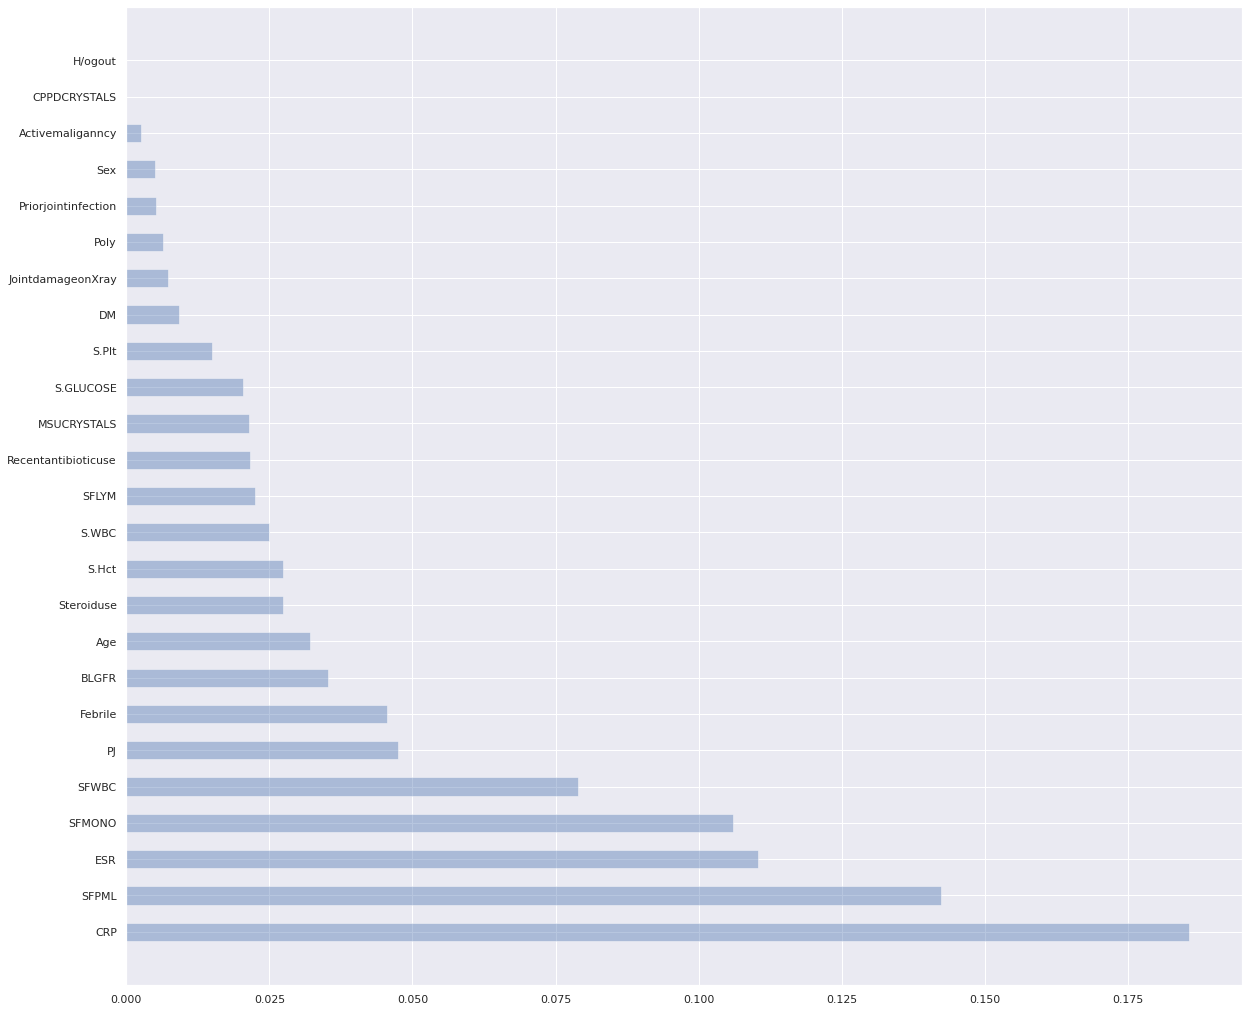

In [ ]:
# Print features organized by importance 
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()